<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:**
- Castillejos Jauregui, Claudia Celeste
- Gallardo      Rafael

**Fecha:** 07 de marzo del 2023.

**Expediente** :
- 735868
- 736376

    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Claudia0806/Tarea4_CCCastillejos_RGallardo

#### Solucion Alumno 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, test_data.shape

In [ ]:
train_labels.shape, test_labels.shape

In [ ]:
np.hstack([train_labels, test_labels]).shape

In [ ]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data


In [ ]:
# Analizamos la distribución de variable MEDV
import seaborn as sn
sn.displot(data, x='MEDV', kde=True)

In [ ]:
# Análisis de correlación (selección de features) heatmap -> annot
corr = data.corr().round(2)

fig, ax = plt.subplots(1,1, figsize=(10, 8))
sn.heatmap(corr, annot=True, ax=ax)

In [ ]:
plt.figure(figsize=(10,7))
plt.boxplot(data)
plt.show()

In [ ]:
# Graficar la salida en el tiempo
output_col = ['MEDV']
data[output_col].plot()

In [ ]:
# Visualizo datos de entrenamiento y de prueba
TEST_SIZE = int(0.2 * data.shape[0])
TRAIN_SIZE = data.shape[0] - TEST_SIZE

t = np.arange(1, X.shape[0] + 1)
train_data, test_data = X[:TRAIN_SIZE], X[TRAIN_SIZE:]
train_labels, test_labels = y[:TRAIN_SIZE], y[TRAIN_SIZE:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(t[:TRAIN_SIZE], train_data, 'r*-', label='train data')
ax[0].plot(t[TRAIN_SIZE:], test_data, 'bo-', label='test data')
ax[0].legend()

ax[1].plot(t[:TRAIN_SIZE], train_labels, 'r*-', label='train labels')
ax[1].plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')
plt.legend()

In [ ]:
test_data.shape, test_labels.shape

In [ ]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [ ]:
train_data

In [ ]:
# Poner una semilla para replicar resultados
tf.random.set_seed(5)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

In [ ]:
model_fit.history.keys()

In [ ]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [ ]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [ ]:
predicted = model.predict(test_data)

In [ ]:
predicted.shape, test_data.shape

In [ ]:
t[TRAIN_SIZE:].shape, test_labels.shape

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(t[TRAIN_SIZE:], predicted, 'r*-', label='prediction')
plt.plot(t[TRAIN_SIZE:], test_labels, 'bo-', label='test labels')

plt.legend()

#### Solución alumno 2

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [4]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [5]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

El objetivo para es este dataset es el siguiente:
1. Construir una red neuronal MLP univariada. Para esto, escoger la variable que más tenga correlación con la variable de salida.
2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de pearson y la otra usando pruebas estadísiticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStoppin` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

El punto 1 ya ha sido hecho en clase, por lo que procederemos al punto 2

##### Punto 2

In [6]:
# Poner una semilla para replicar resultados
tf.random.set_seed(4)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compilar el modelo
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=50, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 37.3644 - mae: 3.5506
Error cuadrático medio en el conjunto de prueba: 37.36435317993164
Error absoluto medio en el conjunto de prueba: 3.550618886947632


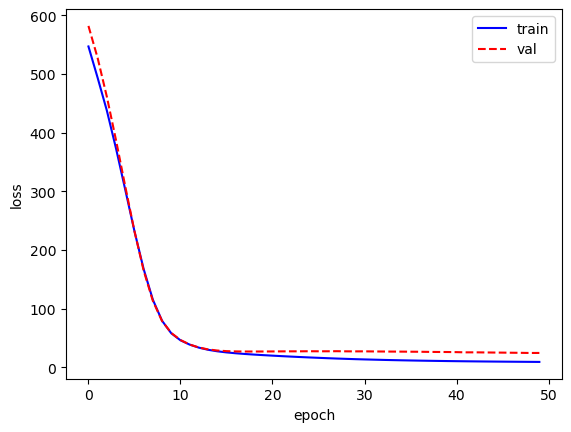

In [8]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

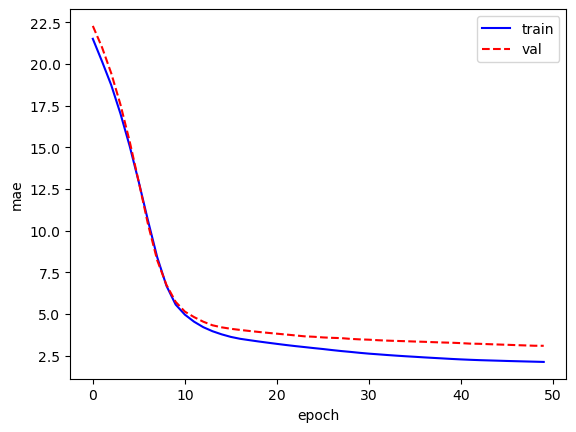

In [9]:
# Graficar métricas de error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

##### Punto 3

In [10]:
from sklearn.feature_selection import SelectKBest

In [11]:
kbest = SelectKBest(k = 6)
kbest.fit(train_data, train_labels)
kbest

SelectKBest(k=6)

In [12]:
kbest.get_support()

array([ True, False, False, False,  True,  True, False, False, False,
        True, False,  True,  True])

In [13]:
train_new = kbest.transform(train_data)
test_new = kbest.transform(test_data)

In [14]:
# Poner una semilla para replicar resultados
tf.random.set_seed(4)

# Definir la arquitectura de la red neuronal
model2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_new.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compilar el modelo
model2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model2_fit = model2.fit(
    train_new, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=100, 
    batch_size=32, 
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model2.evaluate(test_new, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 28.3117 - mae: 3.3906
Error cuadrático medio en el conjunto de prueba: 28.311702728271484
Error absoluto medio en el conjunto de prueba: 3.3905556201934814


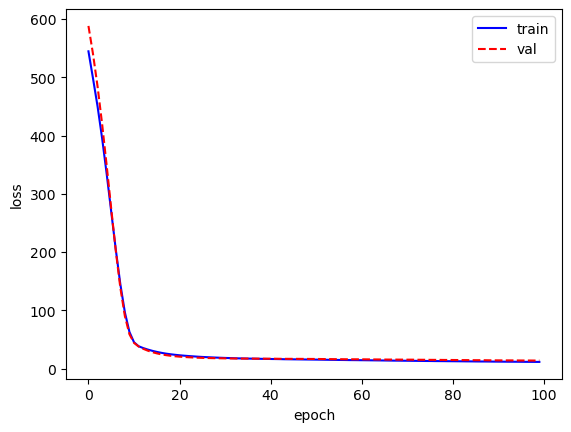

In [16]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model2_fit.history['loss'], 'b', label='train')
plt.plot(model2_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

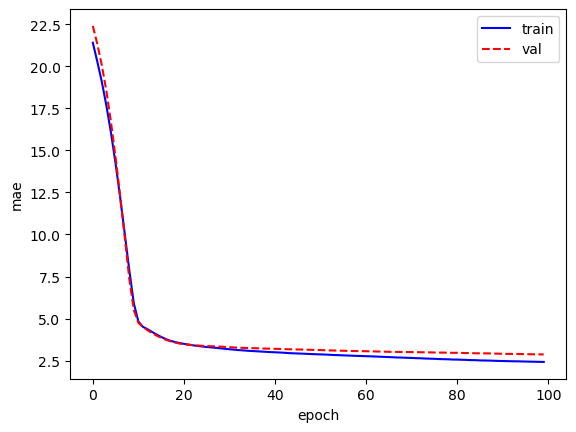

In [17]:
# Graficar métricas de error
plt.plot(model2_fit.history['mae'], 'b', label='train')
plt.plot(model2_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

##### Punto 3.1

In [18]:
es = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)

In [19]:
# Poner una semilla para replicar resultados
tf.random.set_seed(4)

# Definir la arquitectura de la red neuronal
model3 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_new.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compilar el modelo
model3.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model3_fit = model3.fit(
    train_new, train_labels, 
    validation_split=0.2, 
    shuffle=False,
    epochs=1000, 
    batch_size=32, 
    verbose=1,
    callbacks = [es]
)

Epoch 1/1000
11/11 [==============================] - 2s 27ms/step - loss: 520.9326 - mae: 20.9227 - val_loss: 554.8870 - val_mae: 21.7157
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 458.6975 - mae: 19.4027 - val_loss: 491.3440 - val_mae: 20.2680
Epoch 3/1000
11/11 [==============================] - 0s 8ms/step - loss: 398.0779 - mae: 17.8775 - val_loss: 422.2136 - val_mae: 18.6598
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 335.1860 - mae: 16.2582 - val_loss: 346.3136 - val_mae: 16.7150
Epoch 5/1000
11/11 [==============================] - 0s 6ms/step - loss: 264.9081 - mae: 14.1747 - val_loss: 271.1266 - val_mae: 14.5489
Epoch 6/1000
11/11 [==============================] - 0s 7ms/step - loss: 201.0226 - mae: 12.0581 - val_loss: 199.7371 - val_mae: 12.1443
Epoch 7/1000
11/11 [==============================] - 0s 6ms/step - loss: 141.8309 - mae: 9.8106 - val_loss: 140.3925 - val_mae: 9.7294
Epoch 8/1000
11/11 [===============

In [21]:
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model3.evaluate(test_new, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 28.0510 - mae: 3.4866
Error cuadrático medio en el conjunto de prueba: 28.0510311126709
Error absoluto medio en el conjunto de prueba: 3.4866344928741455


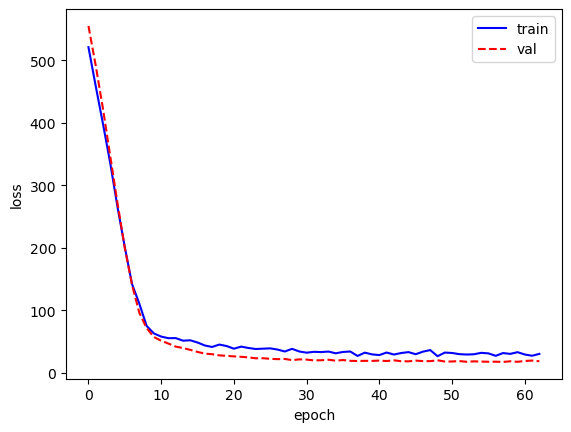

In [22]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model3_fit.history['loss'], 'b', label='train')
plt.plot(model3_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

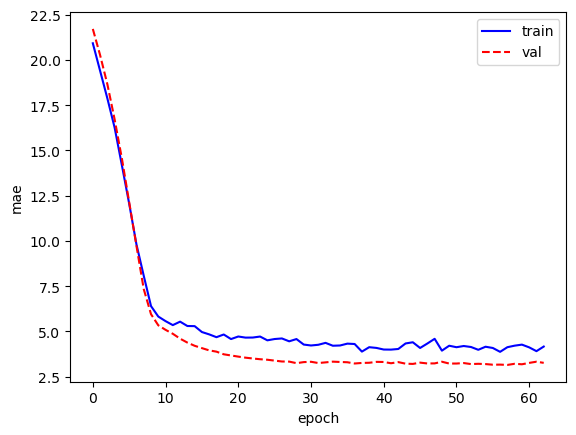

In [23]:
# Graficar métricas de error
plt.plot(model3_fit.history['mae'], 'b', label='train')
plt.plot(model3_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()